# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
# 原始資料
app_train.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 先將所有columns依照類型分類

int_features = []
float_features = []
object_features = []

for dtype, feature in zip(app_train.dtypes, app_train.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)

有278個Nan在AMT_GOODS_PRICE這個欄位中


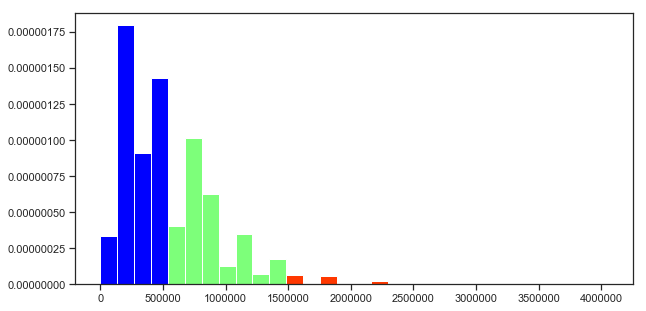

In [6]:
# 根據bin的range映射到不同顏色
cmap = plt.get_cmap('jet')
low = cmap(0.125)
medium =cmap(0.5)
high = cmap(0.85)

# 各挑一種出來作圖，隨便挑一個"AMT_GOODS_PRICE"
print('有{}個Nan在AMT_GOODS_PRICE這個欄位中'.format(app_train['AMT_GOODS_PRICE'].isna().sum()))
# 先把Nan替換成0
app_train['AMT_GOODS_PRICE'].fillna(0, inplace=True)

plt.rcParams['figure.figsize'] = 10, 5
# density表示Y軸變成機率密度
N, bins, patches = plt.hist(app_train['AMT_GOODS_PRICE'], bins=30, density=True)
for i in range(0,4):
    patches[i].set_facecolor(low)
for i in range(4,11):
    patches[i].set_facecolor(medium)
for i in range(11,30):
    patches[i].set_facecolor(high)

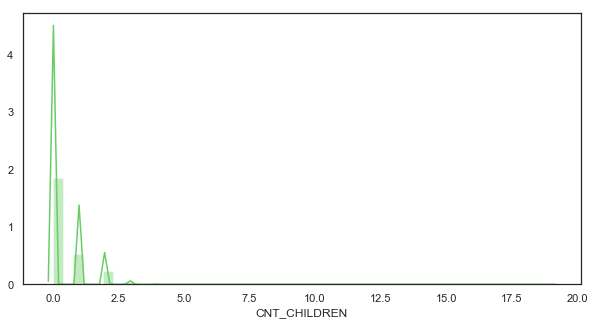

In [7]:
sns.set(style="white", palette="muted", color_codes=True)

# Plot a filled kernel density estimate
sns.distplot(app_train['CNT_CHILDREN'], norm_hist=True, kde=True, hist=True, color="g")

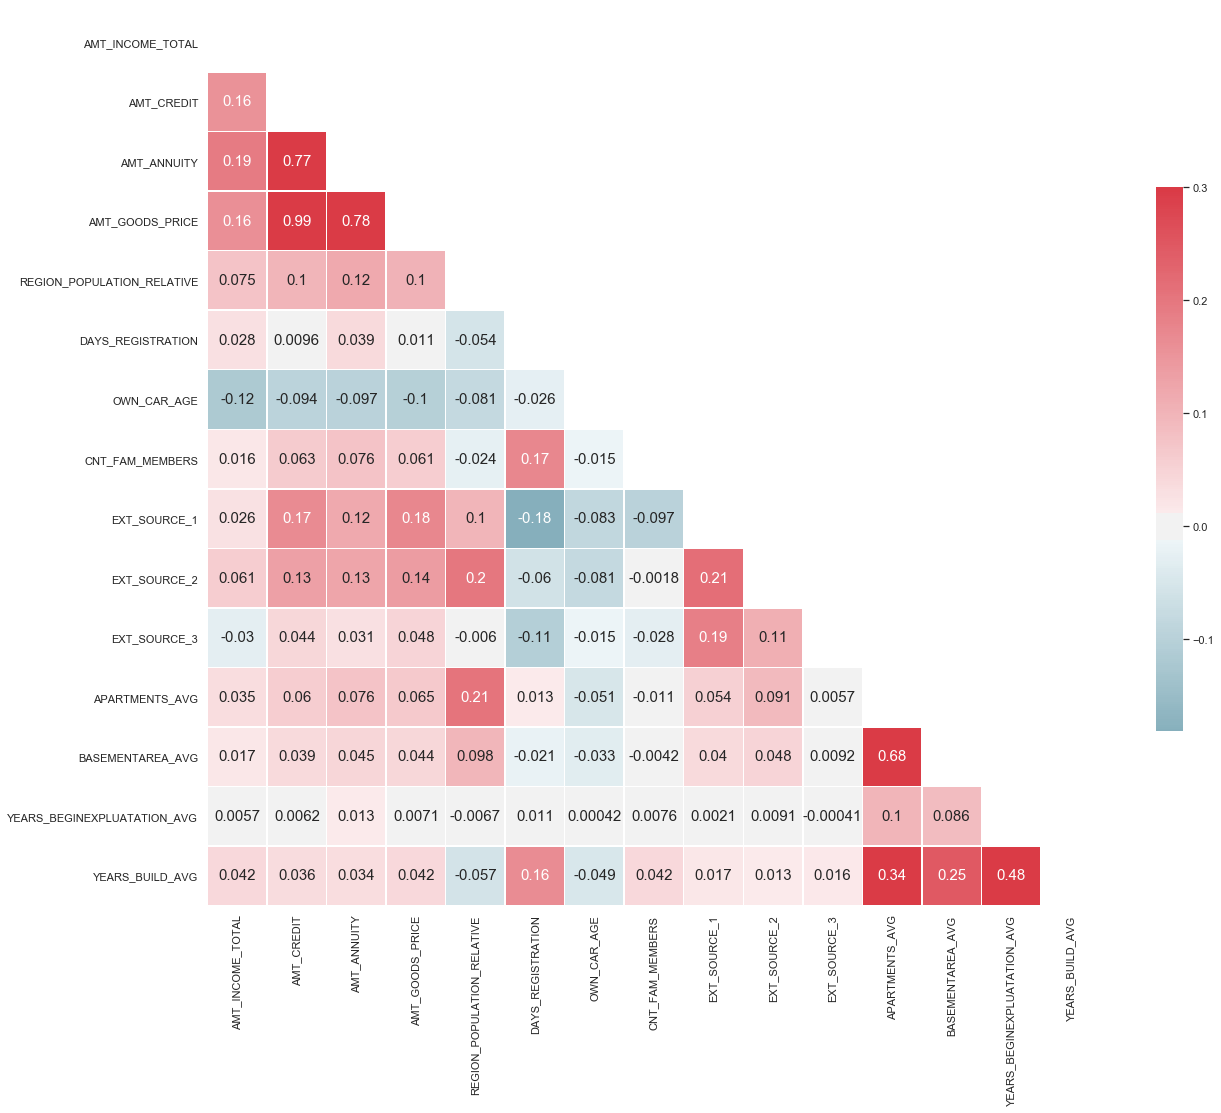

In [8]:
# Plotting a diagonal correlation matrix
plt.rcParams['figure.figsize'] = 20, 20

# Compute the correlation matrix
# 只取前十五個floating的資料欄位來計算
corr = app_train[float_features[:15]].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
'''
    畫heatmap之參數解釋
    
    annot: 將數據填入每個小方格中
    cmap: 從數字到色彩空間的對映，取值是matplotlib包裡的colormap名稱或顏色物件，或者表示顏色的列表；
        改引數預設值：根據center引數設定
    vmax, vmin: 分別是熱力圖的顏色取值最大和最小範圍，預設是根據data資料表裡的取值確定
    cbar_kws={"shrink": .5}: 顏色刻度條的參數，這邊是刻度條縮為原本0.5倍大小
    mask: 控制某個矩陣塊是否顯示出來，這邊的mask是上三角皆為True(不顯示)
    linewidths: 定義熱力圖裡“表示兩兩特徵關係的矩陣小塊”之間的間隔大小
    
    ref: https://www.itread01.com/content/1547188237.html
'''
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, annot_kws={"size": 15},
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

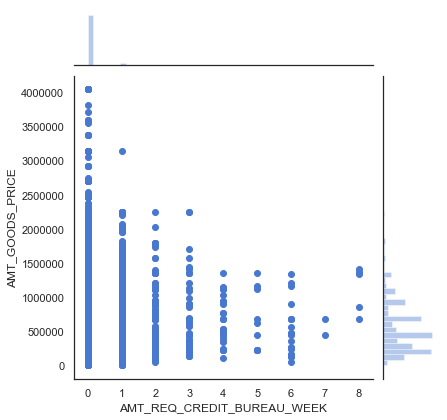

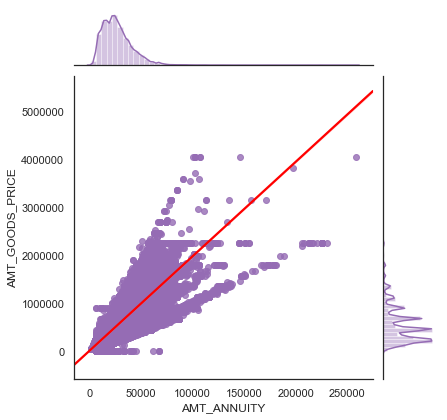

In [9]:
# 計算"AMT_REQ_CREDIT_BUREAU_WEEK"跟"AMT_GOODS_PRICE"的散點圖
sns.jointplot(x='AMT_REQ_CREDIT_BUREAU_WEEK', y='AMT_GOODS_PRICE', data=app_train)
# 計算"AMT_CREDIT"跟"AMT_GOODS_PRICE"的散點圖搭配迴歸分析(紅色回歸線)
# 點的顏色也可以用scatter_kws={"color": "某個顏色"}來設定
# 也可以用sns.regplot來畫
sns.jointplot(x='AMT_ANNUITY', y='AMT_GOODS_PRICE', data=app_train, kind="reg", color='m', line_kws={"color": "red"})

In [10]:
# 計算"AMT_INCOME_TOTAL"欄位的平均數及標準差
mean = app_train['AMT_GOODS_PRICE'].mean()
std = app_train['AMT_GOODS_PRICE'].std()
print(f'mean = {mean}, stddev = {std}')

#更好用的函數.describe()
app_train['AMT_INCOME_TOTAL'].describe()

mean = 537909.4796511345, stddev = 369633.75264811877


count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Text(0.5, 0, 'AMT_INCOME_TOTAL')

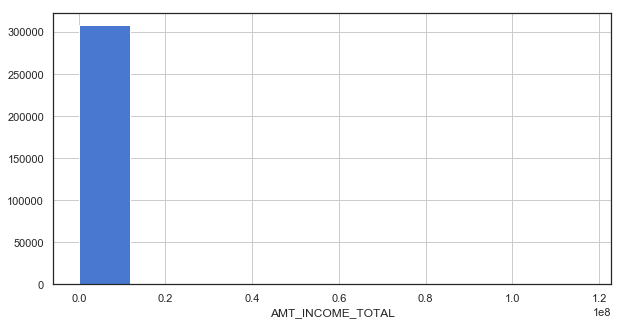

In [11]:
plt.rcParams['figure.figsize'] = 10, 5


# AMT_INCOME_TOTAL直接畫直方圖
app_train['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')

## 注意到該欄位的最大值和 75% 百分位數的值有異常大的差距，所以直接畫直方圖會看不出所以然來，可以先過濾掉再重新畫圖來看

Text(0.5, 0, 'AMT_INCOME_TOTAL')

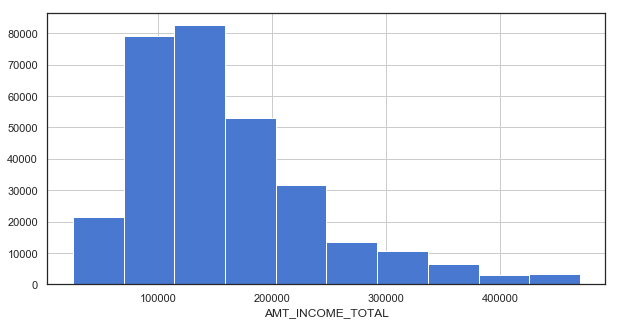

In [12]:
threshold = app_train['AMT_INCOME_TOTAL'].quantile(0.99)

app_train.loc[app_train['AMT_INCOME_TOTAL'] < threshold, 'AMT_INCOME_TOTAL'].hist()

plt.xlabel('AMT_INCOME_TOTAL')